<a href="https://colab.research.google.com/github/Mainabryan/Student-life-segmentation/blob/main/Student_life_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CLUSTERING(UNSUPERVISED LEARNING)

## The whole process ;
1. 🧼 Data Collection & Understanding
Understand what each column means.

Check for missing data (if any).

Check value ranges (Are there outliers or weird values?).

2. 🛠️ Preprocessing
Convert Gender to numbers.

Possibly normalize or standardize data (important for distance-based clustering).

Drop irrelevant columns if needed.

Optional: check for correlation between features.

3. 📊 Exploratory Data Analysis (EDA)
Use visualizations to understand relationships:

Pair plots

Box plots

Histograms

Spot patterns: Are some students more social but sleep less?

4. 🔗 Segmentation (Clustering)
Apply clustering (Agglomerative first).

Choose number of clusters (e.g., using dendrogram or silhouette score).

Get cluster labels (which group each student belongs to).

5. 🧩 Add Cluster Labels to the Data
So now each student belongs to Cluster 0, 1, 2, etc.

6. 📈 Visualize Clusters
Use 2D or 3D plots (e.g., Study Hours vs Social Score).

Color points by cluster.

Help visually explain groupings.

7. 📖 Interpret & Describe the Clusters
What kind of students are in each group?

Group 1: High social, low study

Group 2: Study-focused, balanced sleep

These descriptions are where you create real-world meaning from numbers.

8. 🧭 Insights & Recommendations
Use cluster traits to recommend:

Custom learning paths

Wellness activities

Social interventions

# Data collection and understanding

import the necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

DATASET

In [2]:
data = pd.read_csv('/content/student_lifestyle_data.csv')

In [3]:
data.head()

,Age,Gender,Study Hours per Week,Exercise Frequency (per week),Sleep Hours per Night,Cafeteria Spend ($/week),Social Activity Score (1–100)
0,24,Male,16.599876,2,7.514088,36.236993,98
1,21,Female,21.161268,1,7.685130,95.048716,40
2,22,Male,21.465362,1,7.854651,69.635310,29
3,24,Male,16.428243,1,7.671563,43.503372,77
4,20,Female,29.328873,5,7.964084,10.000000,58


In [4]:
data.tail()

,Age,Gender,Study Hours per Week,Exercise Frequency (per week),Sleep Hours per Night,Cafeteria Spend ($/week),Social Activity Score (1–100)
195,19,Female,12.962681,4,4.000000,13.960391,89
196,19,Female,16.407779,4,6.041557,60.829255,75
197,21,Female,18.932764,4,5.015365,65.183103,77
198,22,Female,21.554538,1,9.463023,38.469792,23
199,20,Male,27.376781,5,8.514726,10.000000,23


In [5]:
data.isnull().sum()

,0
Age,0
Gender,0
Study Hours per Week,0
Exercise Frequency (per week),0
Sleep Hours per Night,0
Cafeteria Spend ($/week),0
Social Activity Score (1–100),0


In [8]:
data.columns

Index(['Age', 'Gender', 'Study Hours per Week',
       'Exercise Frequency (per week)', 'Sleep Hours per Night',
       'Cafeteria Spend ($/week)', 'Social Activity Score (1–100)'],
      dtype='object')

detectng the outliers

<Axes: ylabel='Study Hours per Week'>

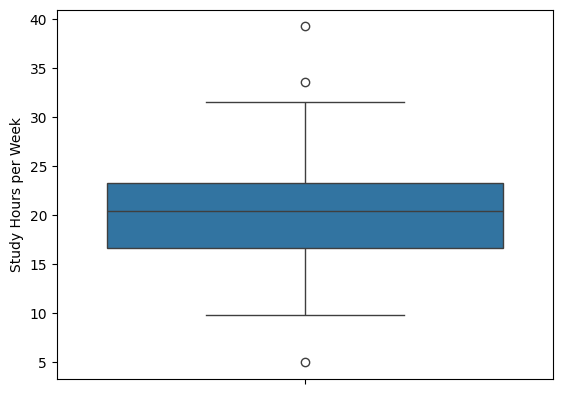

In [11]:
import seaborn as sns

sns.boxplot(data['Study Hours per Week'])

In [13]:
numeric_features=['Age', 'Gender', 'Study Hours per Week',
       'Exercise Frequency (per week)', 'Sleep Hours per Night',
       'Cafeteria Spend ($/week)', 'Social Activity Score (1–100)']
       plt.figure(figsize=(14, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[feature], color="skyblue")
    plt.title(f"Box Plot of {feature}", fontsize=11)
    plt.xlabel("")

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-13-1424644607>, line 4)

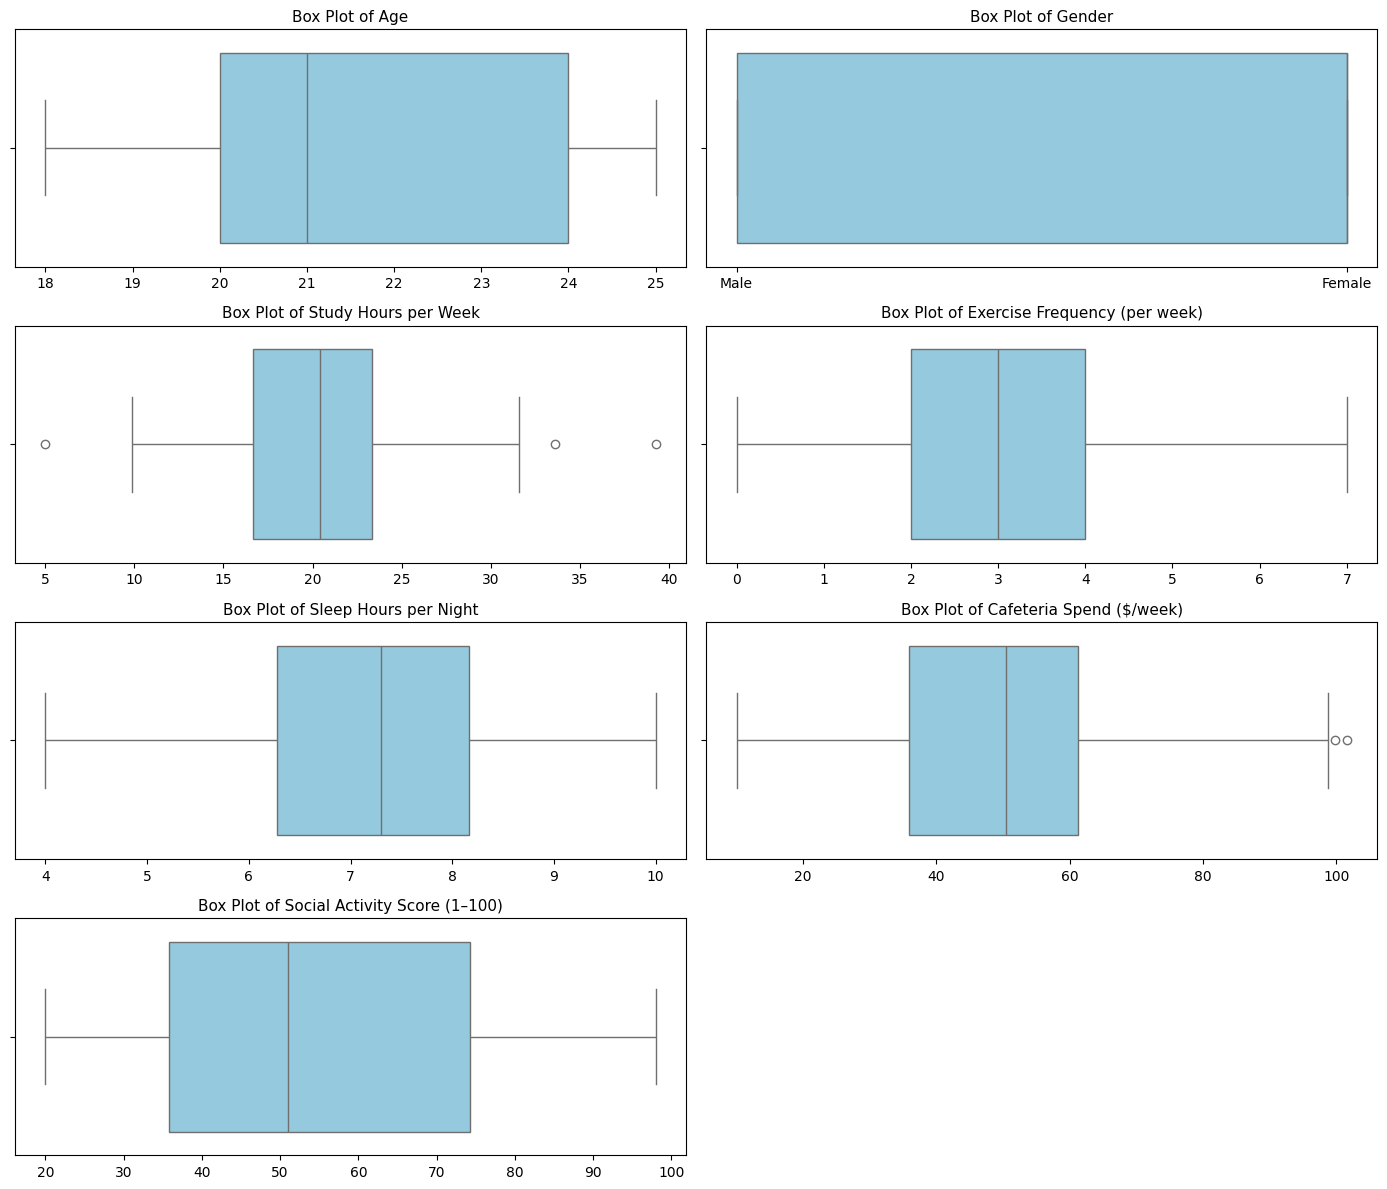

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'Gender', 'Study Hours per Week',
       'Exercise Frequency (per week)', 'Sleep Hours per Night',
       'Cafeteria Spend ($/week)', 'Social Activity Score (1–100)']

plt.figure(figsize=(14, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=data[feature], color="skyblue")
    plt.title(f"Box Plot of {feature}", fontsize=11)
    plt.xlabel("")

plt.tight_layout()
plt.show()


#PREPROCESSING

Conver gender to numerical data

One-Hot Encoding

In [17]:
# Convert gender into numercal figures
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


data.corr

In [18]:
data.corr()

,Age,Gender,Study Hours per Week,Exercise Frequency (per week),Sleep Hours per Night,Cafeteria Spend ($/week),Social Activity Score (1–100)
Age,1.000000,-0.094675,-0.065764,0.005840,-0.003554,0.027633,0.083666
Gender,-0.094675,1.000000,0.009657,-0.037752,0.012076,-0.075287,-0.087550
Study Hours per Week,-0.065764,0.009657,1.000000,0.002650,0.078589,0.060327,-0.070270
Exercise Frequency (per week),0.005840,-0.037752,0.002650,1.000000,-0.099923,-0.071970,0.058443
Sleep Hours per Night,-0.003554,0.012076,0.078589,-0.099923,1.000000,0.034722,-0.121819
Cafeteria Spend ($/week),0.027633,-0.075287,0.060327,-0.071970,0.034722,1.000000,0.027406
Social Activity Score (1–100),0.083666,-0.087550,-0.070270,0.058443,-0.121819,0.027406,1.000000


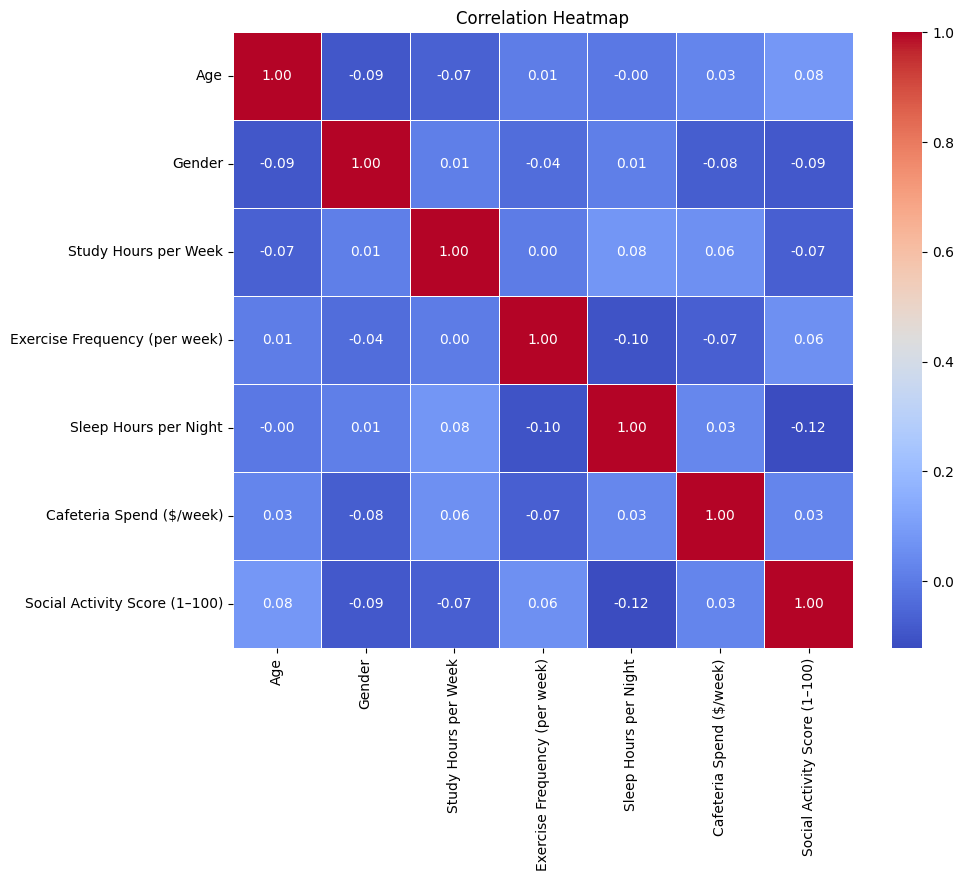

In [19]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Sleep Hours per Night', ylabel='Count'>

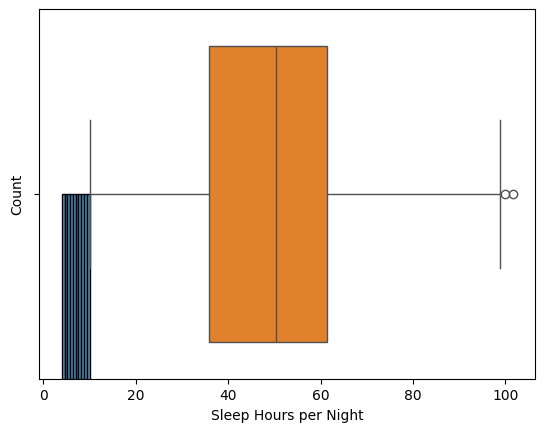

In [20]:
sns.histplot(data["Sleep Hours per Night"])
sns.boxplot(x=data["Cafeteria Spend ($/week)"])


##(EDA)Explatory Data Analysis

Exploratory data analysis (EDA)

is used by data scientists to analyze

 and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            200 non-null    int64  
 1   Gender                         200 non-null    int64  
 2   Study Hours per Week           200 non-null    float64
 3   Exercise Frequency (per week)  200 non-null    int64  
 4   Sleep Hours per Night          200 non-null    float64
 5   Cafeteria Spend ($/week)       200 non-null    float64
 6   Social Activity Score (1–100)  200 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.1 KB


In [22]:
data.describe()

,Age,Gender,Study Hours per Week,Exercise Frequency (per week),Sleep Hours per Night,Cafeteria Spend ($/week),Social Activity Score (1–100)
count,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,21.560000,0.50500,20.343103,2.91500,7.198860,50.025841,55.170000
std,2.283082,0.50123,4.825238,1.70361,1.438234,19.986152,22.807499
min,18.000000,0.00000,5.000000,0.00000,4.000000,10.000000,20.000000
25%,20.000000,0.00000,16.671849,2.00000,6.274958,35.945065,35.750000
50%,21.000000,1.00000,20.447175,3.00000,7.295591,50.385338,51.000000
75%,24.000000,1.00000,23.332487,4.00000,8.162836,61.303552,74.250000
max,25.000000,1.00000,39.263657,7.00000,10.000000,101.594187,98.000000


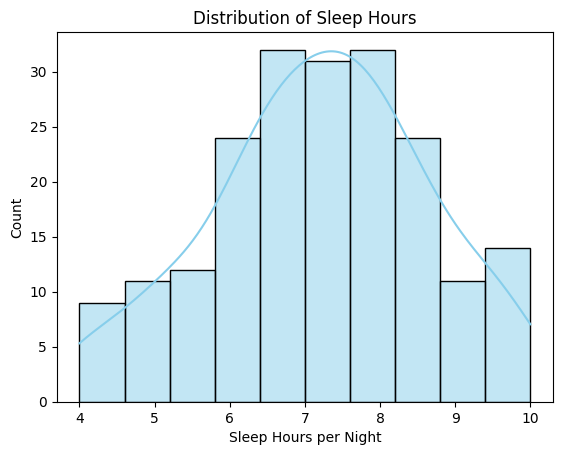

In [23]:
sns.histplot(data["Sleep Hours per Night"], kde=True, color="skyblue")
plt.title("Distribution of Sleep Hours")
plt.show()

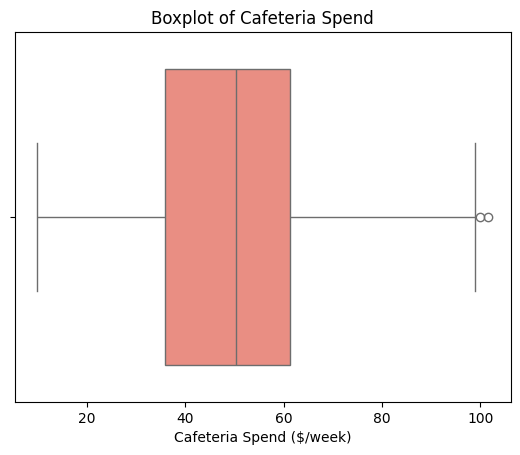

In [24]:
sns.boxplot(x=data["Cafeteria Spend ($/week)"], color="salmon")
plt.title("Boxplot of Cafeteria Spend")
plt.show()

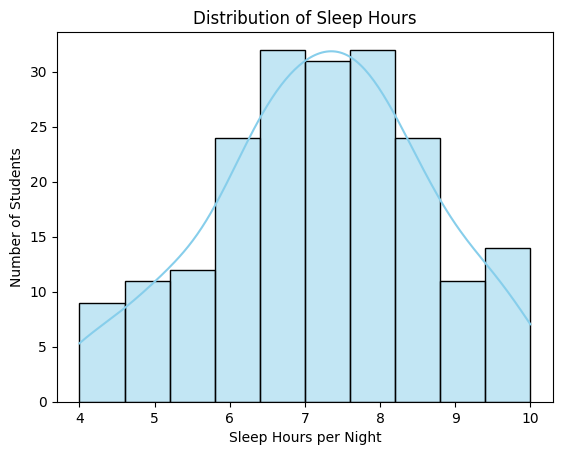

In [25]:
sns.histplot(data["Sleep Hours per Night"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Number of Students")
plt.show()

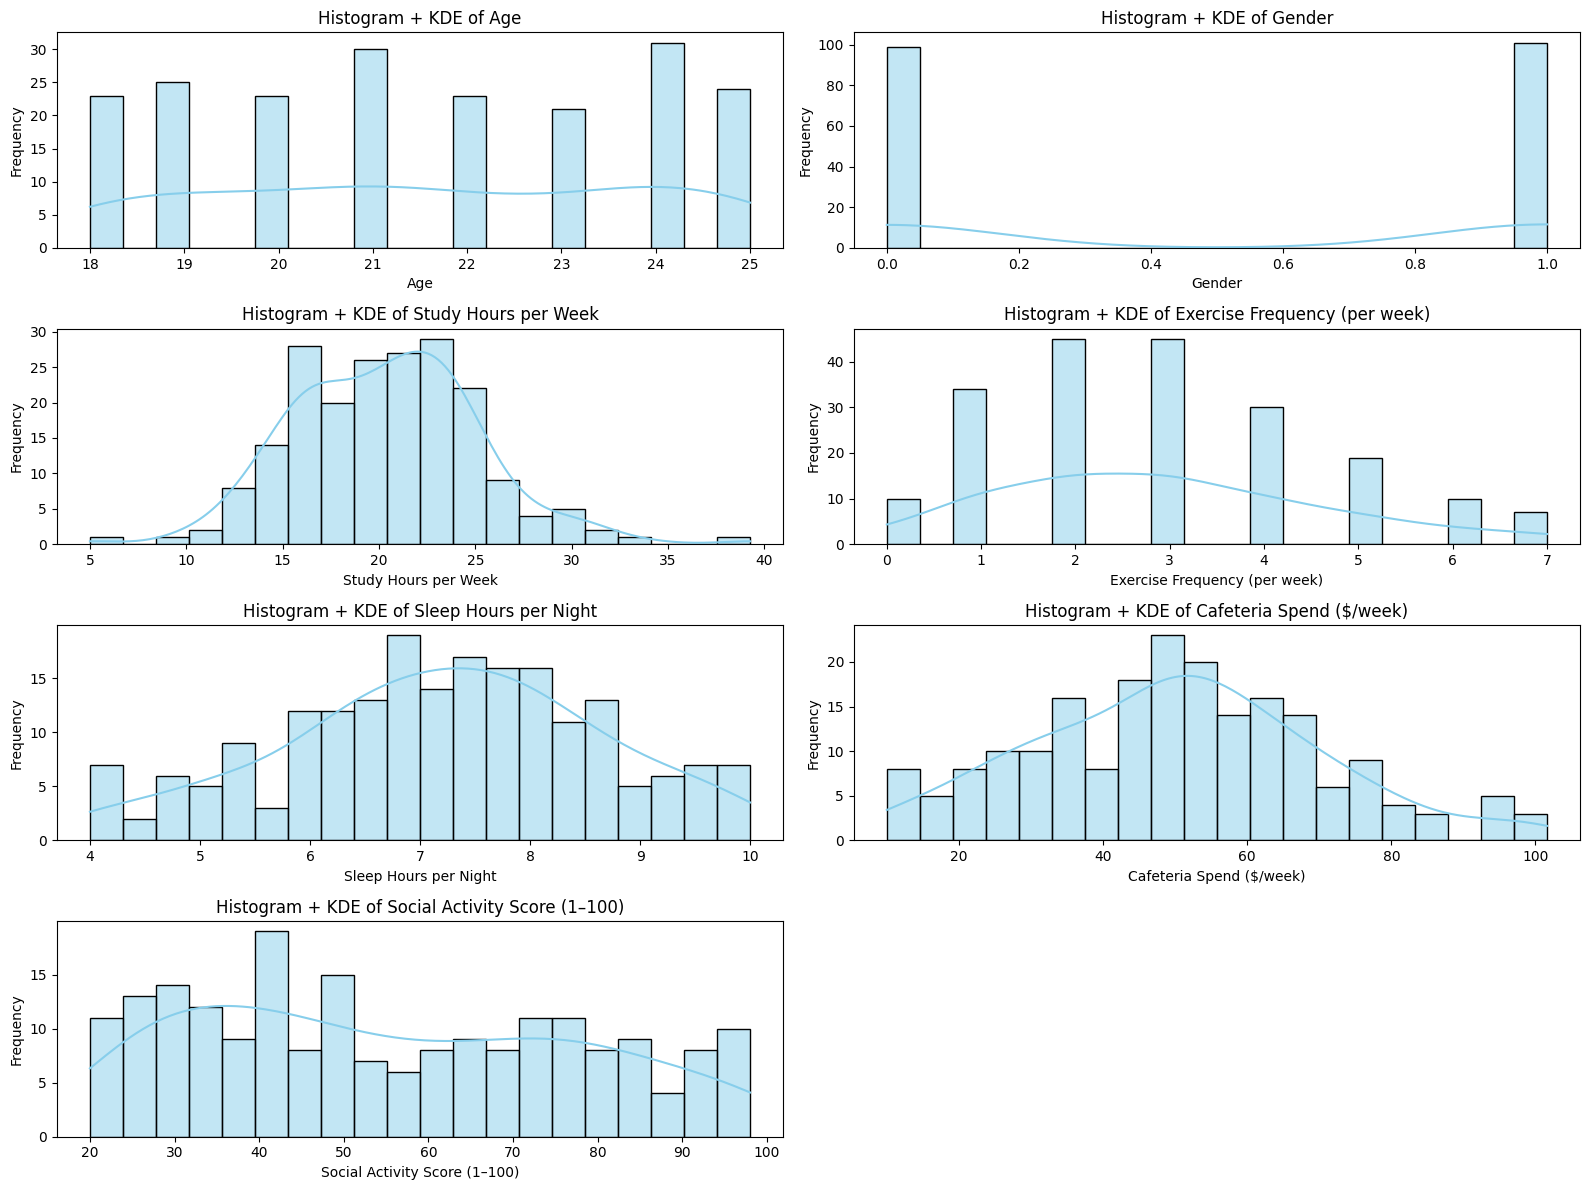

In [27]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Histogram + KDE of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()